<h1 align=center> Tarea 7: Decision Trees y Random Forest
 </h1>

Integrantes:
- Axel Mondaca
- Sebastián Hernández

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('beans_Tarea7.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


1. Modelamiento con Decision Tree

In [3]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [4]:
#Normalizamos
scaler = StandardScaler()
numericas_cont = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
from sklearn.preprocessing import LabelEncoder 

categoricas = ['Class']

df_norm = pd.get_dummies(df, columns=categoricas,drop_first=True)
df_norm[numericas_cont] = scaler.fit_transform(df_norm[numericas_cont]) #Ahora utilizaremos el One Hot Enconding

class_name = ['Class_DERMASON','Class_SEKER','Class_SIRA','Class_HOROZ','Class_CALI','Class_BOMBAY']
name = ['DERMASON','SEKER','SIRA','HOROZ','CALI','BOMBAY']
X = df_norm.drop(class_name, axis=1)
y = df['Class']

In [5]:
#División de conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=254)

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2,5,20]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=254), 
                       param_grid_dt, 
                       cv=5, 
                       scoring='accuracy', 
                       n_jobs=-1)

# Entrenar búsqueda
grid_dt.fit(X_train, y_train)

print("Mejores parámetros Árbol:", grid_dt.best_params_)
print("Mejor Score CV:", grid_dt.best_score_)

# Actualizar tu variable 'arbol' con el mejor modelo encontrado
arbol = grid_dt.best_estimator_

Mejores parámetros Árbol: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor Score CV: 0.9046926820401385


In [7]:
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)
másimportantes_arbol = pd.Series ( arbol.feature_importances_, index=X.columns).sort_values(ascending=False)
másimportantes_arbol

ShapeFactor3       0.207842
ShapeFactor1       0.199096
MajorAxisLength    0.191375
Perimeter          0.174715
MinorAxisLength    0.068944
roundness          0.060593
Compactness        0.038101
ShapeFactor4       0.020762
Solidity           0.015091
Area               0.007547
Extent             0.004853
ConvexArea         0.003315
EquivDiameter      0.002730
ShapeFactor2       0.001955
Eccentricity       0.001585
AspectRation       0.001496
dtype: float64

Como se puede observar, las cinco caracteristicas más importantes son ShapeFactor3, ShapeFactor1, MajorAxisLength y Perimeter, el resto tiene una incidencia menor.

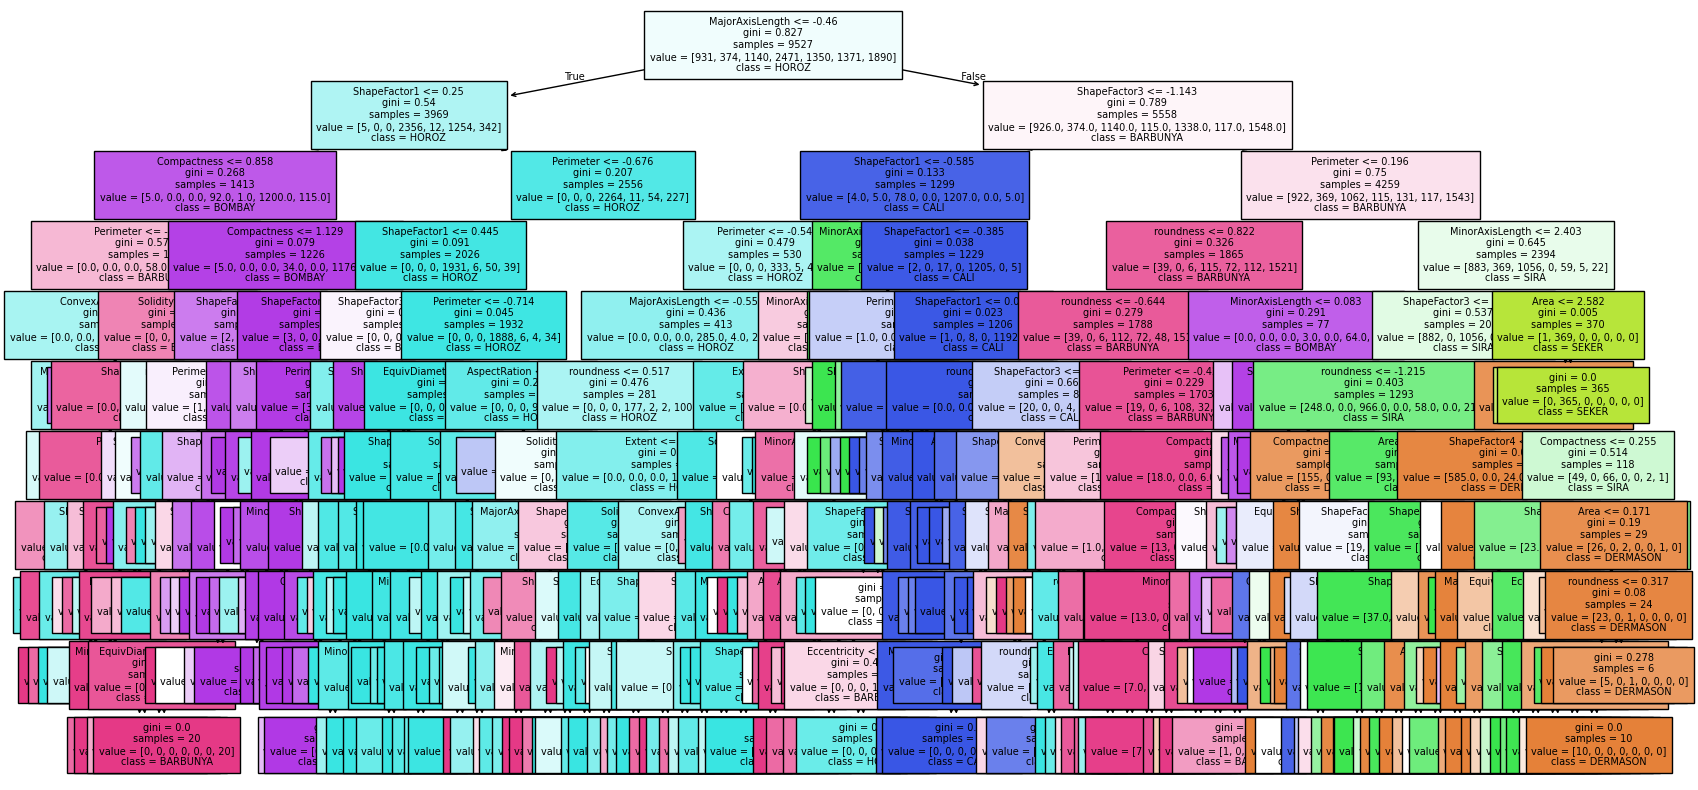

In [ ]:
plt.figure(figsize=(20,10))
'DERMASON','SEKER','SIRA','HOROZ','CALI','BOMBAY'
plot_tree(arbol, feature_names=X.columns, class_names=['DERMASON', 'SEKER','SIRA', 'HOROZ', 'CALI', 'BOMBAY','BARBUNYA'], filled=True, fontsize=7)             
plt.show() 

Al tener mayor nivel de profundidad el modelo se realiza más preguntas para identificar de mejor manera la clase del frijol.

In [9]:
print(classification_report(y_test, y_pred_arbol))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.91      0.91       391
      BOMBAY       1.00      1.00      1.00       148
        CALI       0.92      0.92      0.92       490
    DERMASON       0.90      0.92      0.91      1075
       HOROZ       0.96      0.92      0.94       578
       SEKER       0.95      0.95      0.95       656
        SIRA       0.85      0.85      0.85       746

    accuracy                           0.91      4084
   macro avg       0.93      0.92      0.93      4084
weighted avg       0.91      0.91      0.91      4084



Con una precisión del 91% se logra identificar la clase de frijol con un recal superior a 0.92, sin embargo, para SIRA cuesta un poco más reconocerla.

2. Modelamiento con Random Forest

In [20]:
param_grid_rf = {
    'n_estimators': [50, 100, 200], # Número de árboles en el bosque
    'max_depth': [5, 10, None],     # Profundidad máxima del árbol
    'ccp_alpha': [0.001, 0.01, 0.1, 1, 10] # Parámetro de poda (equivalente a "alpha")
}

# 2. Configurar GridSearch (con 5-Fold Cross Validation)
rf_base = RandomForestClassifier(random_state=254)

grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    cv=5,                     # 5-fold Cross Validation (según instrucción)
    scoring='accuracy',       # Usamos accuracy como métrica de optimización
    n_jobs=-1                 # Usar todos los núcleos para velocidad
)

# 3. Entrenar y optimizar (esto ajusta el modelo 45 veces * 5 folds = 225 veces)
print("Iniciando búsqueda de hiperparámetros para Random Forest...")
grid_search_rf.fit(X_train, y_train)

# 4. Mostrar resultados
print(f"Mejores parámetros: {grid_search_rf.best_params_}")
print(f"Mejor Accuracy en Validación Cruzada: {grid_search_rf.best_score_:.4f}")

# 5. Sobrescribir la variable 'Forest' con el modelo optimizado
Forest = grid_search_rf.best_estimator_

Iniciando búsqueda de hiperparámetros para Random Forest...
Mejores parámetros: {'ccp_alpha': 0.001, 'max_depth': None, 'n_estimators': 200}
Mejor Accuracy en Validación Cruzada: 0.9148


In [21]:
Forest.fit(X_train, y_train)
y_pred_forest = Forest.predict(X_test)

masimportantes_forest = pd.Series (Forest.feature_importances_, index=X.columns).sort_values(ascending=False)
masimportantes_forest

Perimeter          0.105070
Compactness        0.103360
ShapeFactor3       0.100351
MinorAxisLength    0.092377
MajorAxisLength    0.083640
ShapeFactor1       0.083072
ConvexArea         0.069208
Area               0.064134
AspectRation       0.057621
Eccentricity       0.057349
EquivDiameter      0.056790
ShapeFactor2       0.051327
roundness          0.047938
ShapeFactor4       0.018919
Solidity           0.007715
Extent             0.001129
dtype: float64

Se puede observar que ShapeFactor1, Compactness y Perimeter se mantienen entre las más importantes y en el mismo orden anterior, MajorAxisLength en cambio queda bajo MinorAxisLength pero se mantiene entre las cinco variables más importantes 

In [22]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       391
      BOMBAY       1.00      1.00      1.00       148
        CALI       0.93      0.93      0.93       490
    DERMASON       0.91      0.94      0.93      1075
       HOROZ       0.96      0.95      0.95       578
       SEKER       0.95      0.95      0.95       656
        SIRA       0.87      0.86      0.87       746

    accuracy                           0.93      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.93      0.93      0.93      4084



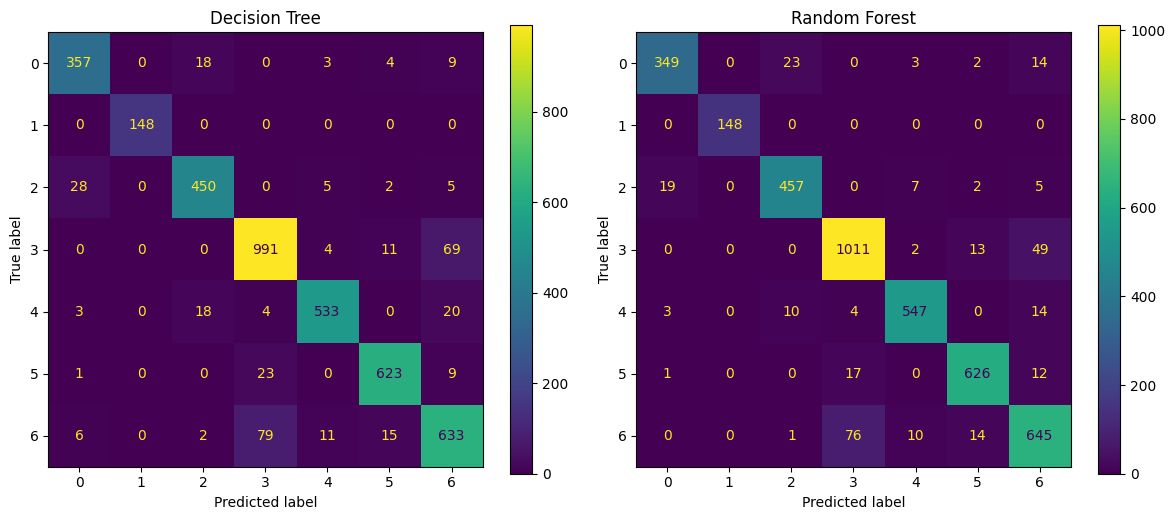

In [23]:
# Matrices de confusión
confusion_matrix_arbol = confusion_matrix(y_test, y_pred_arbol)
confusion_matrix_Forest = confusion_matrix(y_test, y_pred_forest)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix_arbol).plot(ax=ax[0])
ax[0].set_title("Decision Tree")
ConfusionMatrixDisplay(confusion_matrix_Forest).plot(ax=ax[1])
ax[1].set_title("Random Forest")
plt.tight_layout()
plt.show()

3. Selección de modelos

Voting (Ensemble de diferentes modelos a elección)

In [18]:
rl = LogisticRegression(max_iter=1000)

In [19]:
voting = VotingClassifier(estimators=[('Arbol', arbol), ('Forest', Forest), ('LogReg', rl)], voting='soft')
voting.fit(X_train, y_train)
y_pred_vote = voting.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.88      0.92       391
      BOMBAY       1.00      0.98      0.99       148
        CALI       0.91      0.96      0.93       490
    DERMASON       0.92      0.92      0.92      1075
       HOROZ       0.97      0.92      0.95       578
       SEKER       0.96      0.92      0.94       656
        SIRA       0.81      0.89      0.85       746

    accuracy                           0.92      4084
   macro avg       0.93      0.92      0.93      4084
weighted avg       0.92      0.92      0.92      4084



1.- En base a la metrica de Accuracy, el mejor modelo entre los dos es el modelo Random Forest, con una accuracy de 0,93 a comparacion del modelo con Decision Tree el cual tiene un Accuracy de 0,91.

2.- Entre los dos modelos, el modelo que mejor predice la clase Bombay es el modelo Decision Tree

3.- El par de clases más confundidas para el modelo Random Forest son las clases